# Example using electric guitar data
In this notebook the model for pitch detection using the LOO-3 (leave one out for 3 tones) approach is tested on real audio corresponding to electric guitar.

In [1]:
%matplotlib inline
import sys 
sys.path.append('../../../')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gpflow, gpitch
reload(gpitch)
from gpitch.amtgp import logistic
from scipy.fftpack import fft, ifft, ifftshift, fftshift
import soundfile

In [2]:
#np.random.seed(29)
plt.rcParams['figure.figsize'] = (16, 3)  # set plot size

### Load training data
In this case we have three recordings of isolated sound events.

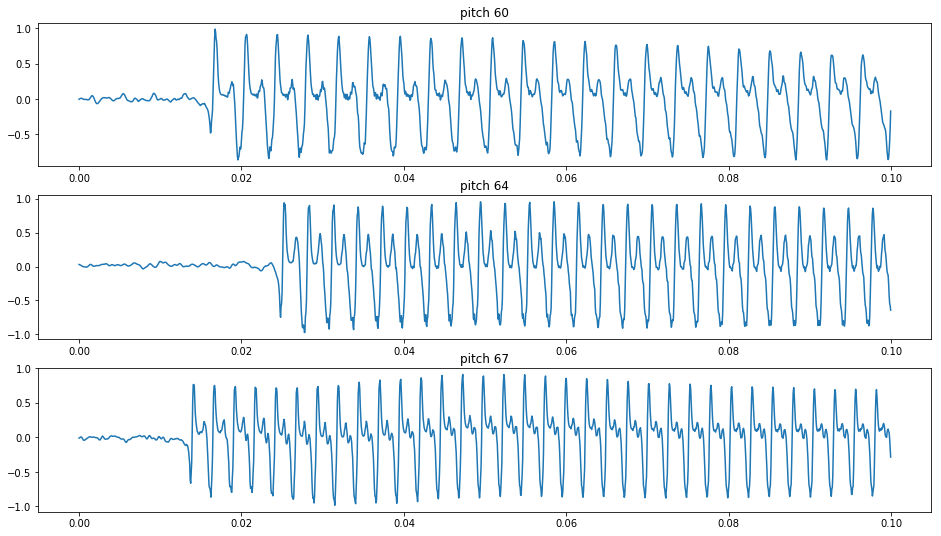

In [3]:
plist = np.asarray(['60', '64', '67'])
N, Np = 1600, plist.size  # number of frames, pitches
y = np.zeros((N, Np)) 
plt.figure(figsize=(16, 3*3))
for i in range(Np):  # load training data
    filename = '../../../../datasets/fender/train/m_' + plist[i] + '.wav'
    y[:,i], fs = soundfile.read(filename, start=700, frames=N) 
    x = np.linspace(0, (N-1.)/fs, N)
    plt.subplot(3,1,i+1)
    plt.title('pitch ' + plist[i])
    plt.plot(x, y[:,i])

### Initialize kernels
we need to define 2 activation kernels and 2 component kernels

In [4]:
Nh = 15  # number of maximun harmonics per component
k1_act = gpflow.kernels.Matern32(1)
k2_act = gpflow.kernels.Matern32(1)
k1_com = gpitch.kernels.MaternSpecMixSL(Nh)
k2_com = gpitch.kernels.MaternSpecMixSL(Nh)

AttributeError: 'NoneType' object has no attribute 'size'

Here we decide whether to run training or load previously learned parameters

In [ ]:
run_learning = True
if run_learning:
    for i in range(Np):
        ideal_f0 = gpitch.amtgp.midi2frec(int(plist[i]))  # Init comp params 4 each pitch 
        f_star, s_star, F, Y, S= gpitch.amtgp.init_com_params(y=y[:,i], fs=fs, Nh=Nh, 
                                                              ideal_f0=ideal_f0, win_size=6)
        plt.figure()
        plt.plot(F, S/np.max(S))
        plt.plot(f_star, s_star/np.max(s_star), 'xk', mew=2)
        plt.legend(['Smoothed spectral density of data', 'location of harmonics found for initialization'])
        plt.xlim([0, 8000])
else:
    pass  # code for loading learned params




## Pitch detection
Load test data

In [ ]:
ytest, fs = soundfile.read('../../../../datasets/fender/test/test_data.wav')
Ntest = ytest.size
xtest = np.linspace(0,(Ntest-1.)/fs, Ntest )
plt.figure()
plt.plot(xtest, ytest)

Learning parameters